In [1]:
import os
import pandas as pd
import re

In [62]:
PROJECTS_DIR  = "_gsocprojects"
PROPOSALS_DIR = "_gsocproposals"
ORGS_DIR      = "_gsocorgs"

columns_project = ["Name", "Year"]
columns_prop    = ["Project", "Organization", "Year", "Title"]
columns_org     = ["Name", "Year"]

project_name_re      = "project: (.*)\n"
organization_name_re = "organization: (.*)\n"
proposal_name_re     = "title:\s*\"?(.*)\"?\n"
proposal_project_re  = "project:\s*(.*)\n"
proposal_org_re      = "organization:[\n| ]([\s\-\w]*)---"

In [63]:
projects  = pd.DataFrame(columns=columns_project)
proposals = pd.DataFrame(columns=columns_prop)
orgs      = pd.DataFrame(columns=columns_org)

In [64]:
for year in ['2017', '2018', '2019'] :
    # Get projects
    for p in os.listdir(os.path.join(PROJECTS_DIR, year)):
        with open(os.path.join(PROJECTS_DIR, year, p)) as f:
            result = re.search(project_name_re, f.read())
            projects.loc[len(projects)] = [result.group(1), year]

    # Get orgs
    for p in os.listdir(os.path.join(ORGS_DIR, year)):
        with open(os.path.join(ORGS_DIR, year, p)) as f:
            result = re.search(organization_name_re, f.read())
            orgs.loc[len(orgs)] = [result.group(1), year]

    # Get proposals
    for p in os.listdir(os.path.join(PROPOSALS_DIR, year)):
        with open(os.path.join(PROPOSALS_DIR, year, p)) as f:
            if p.startswith("proposal_"):
                content = f.read()
                title = re.search(proposal_name_re, content).group(1)
                try:
                    project = re.search(proposal_project_re, content).group(1)
                except:
                    project = "NA"
                org = re.search(proposal_org_re, content).group(1)
                org_split = org.replace("- ", "").replace(" - ", "").rstrip("\n").split("\n")
                org_string = ", ".join(filter(None, org_split))
                proposals.loc[len(proposals)] = [project, org_string, year, title]

# GSoC 2019 in numbers (6 Feb 2019)

In [65]:
# Number of proposals
numProp = len(proposals[proposals.Year == "2019"])

# Number of Organizations
numOrgs = len(orgs[orgs.Year == "2019"])

# Number of Projects 
numProjects =  len(projects[projects.Year == "2019"])

In [66]:
print("2019 Summary")
print("Number of submitted proposals:", numProp)
print("Number of submitted projects:", numProjects)
print("Number of submitted organizations:", numOrgs)

2019 Summary
Number of submitted proposals: 50
Number of submitted projects: 28
Number of submitted organizations: 29


## New projects and organizations


In [67]:
org2019 = orgs[orgs.Year == "2019"].sort_values(by="Name")
org2018 = orgs[orgs.Year == "2018"].sort_values(by="Name")

commonOrgs = org2018.merge(org2019,on=['Name'])
commonOrgs

,Name,Year_x,Year_y
0,AARNet,2018,2019
1,CERN,2018,2019
2,FSU,2018,2019
3,Florida,2018,2019
4,ImperialCollege,2018,2019
5,KIT,2018,2019
6,LAL,2018,2019
7,LBNL,2018,2019
8,LLR,2018,2019
9,LPC-Clermont,2018,2019


In [68]:
newOrgs2019 = org2019[~org2019.Name.isin(commonOrgs.Name)]

print("New organization in 2019 wrt to 2018: ", len(newOrgs2019))
newOrgs2019

New organization in 2019 wrt to 2018:  14


,Name,Year
58,BNL,2019
55,CC-IN2P3,2019
75,DESY,2019
63,ISS,2019
80,MdS,2019
54,MonashUniversity,2019
77,Pittsburgh,2019
62,UCB,2019
76,UCIrvine,2019
60,UCSD,2019


In [101]:
# Completely new orgs
orgsParticipation = orgs.groupby("Name").count() 

commonEveryYear = orgsParticipation[orgsParticipation.Year == 3]
participatedOnce = orgsParticipation[orgsParticipation.Year == 1]

org2019[org2019.Name.isin(participatedOnce.index)]

,Name,Year
55,CC-IN2P3,2019
75,DESY,2019
63,ISS,2019
80,MdS,2019
54,MonashUniversity,2019
77,Pittsburgh,2019
62,UCB,2019
76,UCIrvine,2019
60,UCSD,2019
64,UMass,2019


In [73]:
# Completely new projects

projectsParticipation = projects.groupby("Name").count() 

commonEveryYear = projectsParticipation[projectsParticipation.Year == 3]
participatedOnce = projectsParticipation[projectsParticipation.Year == 1]

proj2019 = projects[projects.Year == "2019"].sort_values(by="Name")
table = proj2019[proj2019.Name.isin(participatedOnce.index)]

,Name,Year
42,ALICE,2019
45,Acts,2019
68,Allen,2019
63,AstroLab,2019
58,DIRAC,2019
49,IRIS-HEP,2019
65,KM3NeT,2019
46,Molr,2019
51,Patatrack,2019
48,Phoenix,2019


In [97]:
list(table["Name"])

['ALICE',
 'Acts',
 'Allen',
 'AstroLab',
 'DIRAC',
 'IRIS-HEP',
 'KM3NeT',
 'Molr',
 'Patatrack',
 'Phoenix',
 'Rucio',
 'SWAN',
 'VecGeom']

## Evolution 



In [9]:
years = ["2017", "2018", "2019"]
gsocSummary = pd.DataFrame(columns=["Proposals", "Projects", "Orgs"])

for y in years:
    prop = len(proposals[proposals.Year == y])
    proj = len(projects[projects.Year == y])
    org = len(orgs[orgs.Year == y])
    gsocSummary.loc[int(y)] = [prop, proj, org]
    

In [10]:
gsocSummary

,Proposals,Projects,Orgs
2017,36,18,24
2018,51,23,30
2019,50,28,29


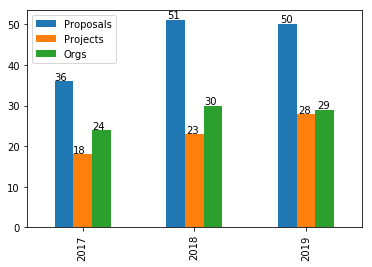

In [19]:
import matplotlib

%matplotlib inline 

ax = gsocSummary.plot(kind='bar')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.008))

# List of projects 2019

In [88]:
# List of projects
projects[projects.Year == "2019"].sort_values(by="Name")

,Name,Year
42,ALICE,2019
59,ATLAS,2019
45,Acts,2019
68,Allen,2019
57,AllpixSquared,2019
63,AstroLab,2019
56,CERNBox,2019
67,CernVM-FS,2019
60,DD4hep,2019
58,DIRAC,2019


## List of Orgs 2019

In [89]:
# List of projects
orgs[orgs.Year == "2019"].sort_values(by="Name")

,Name,Year
70,AARNet,2019
58,BNL,2019
55,CC-IN2P3,2019
78,CERN,2019
75,DESY,2019
61,FSU,2019
67,Florida,2019
63,ISS,2019
71,ImperialCollege,2019
69,KIT,2019
